<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/Notebooks/IT24102388_Handling_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning Git repository...
Cloning into 'Brain-Tumor-Detection'...
remote: Enumerating objects: 6812, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 6812 (delta 18), reused 10 (delta 0), pack-reused 6760 (from 3)
Receiving objects: 100% (6812/6812), 143.82 MiB | 36.96 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (7031/7031), done.
Repository cloned in 6.34 seconds
Checking Training directory: /content/Brain-Tumor-Detection/data/Training
Training contents: ['notumor', 'meningioma', 'glioma', 'pituitary']
Checking Testing directory: /content/Brain-Tumor-Detection/data/Testing
Testing contents: ['notumor', 'meningioma', 'glioma', 'pituitary']
Files in notumor (Training): ['Tr-no_0230.jpg', 'Tr-no_0975.jpg', 'Tr-no_0941.jpg', 'Tr-no_0322.jpg', 'Tr-no_0306.jpg']...
Files in meningioma (Training): ['Tr-me_0402.jpg', 'Tr-me_1185.jpg', 'Tr-me_0208.jpg', 'Tr-me_0049.jpg', 'Tr-me_0633.jpg']...
Files in 

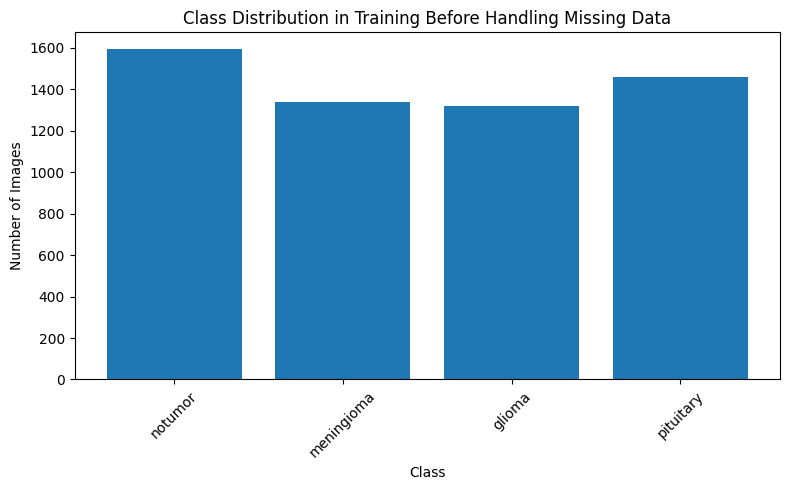

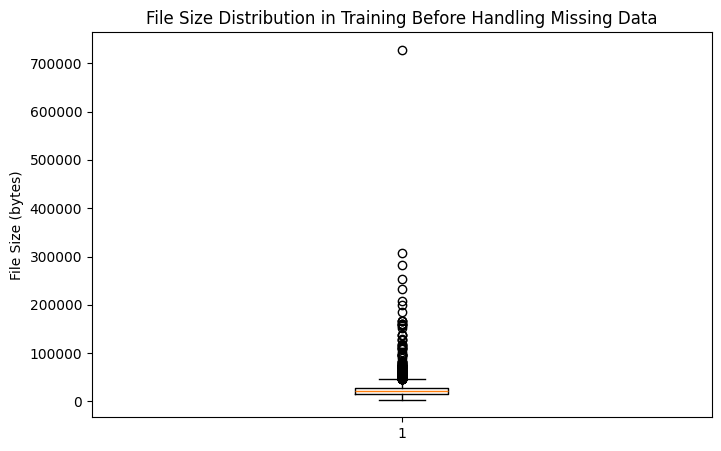

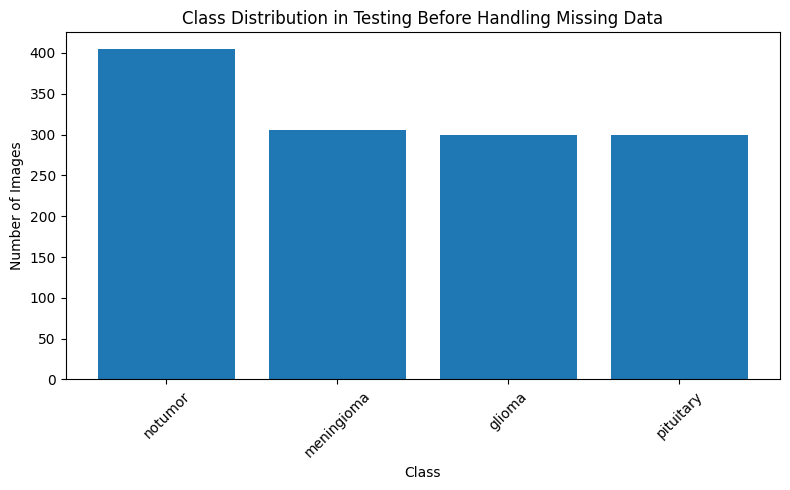

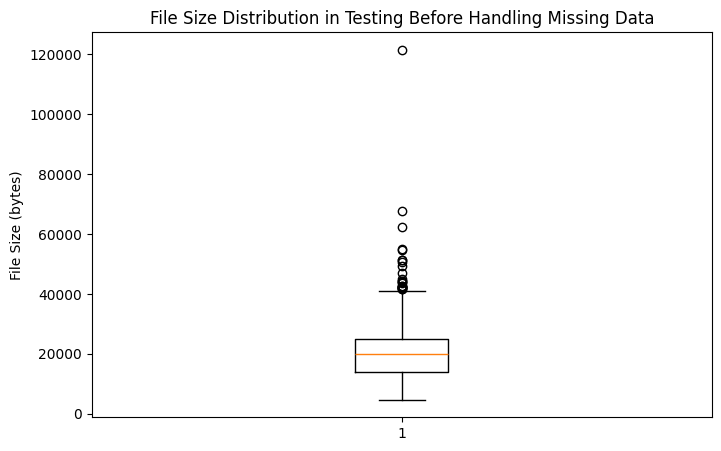

Total valid images after handling: 7023
Image counts after handling missing data: {'Training': Counter({'notumor': 1595, 'pituitary': 1457, 'meningioma': 1339, 'glioma': 1321}), 'Testing': Counter({'notumor': 405, 'meningioma': 306, 'glioma': 300, 'pituitary': 300})}


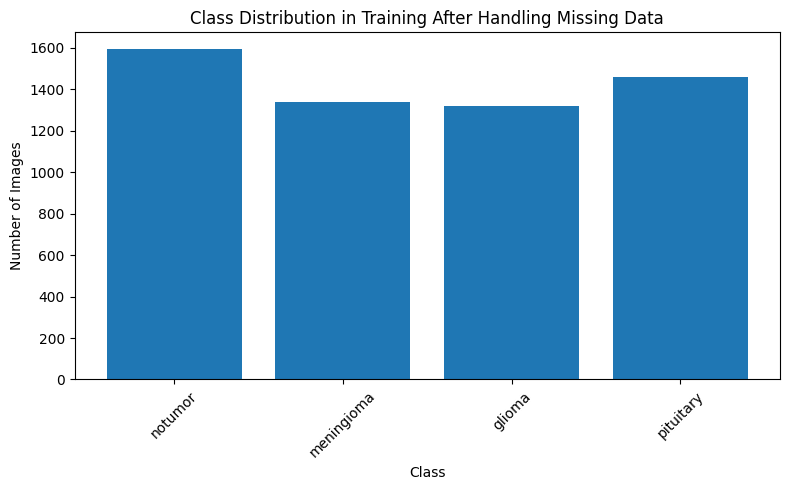

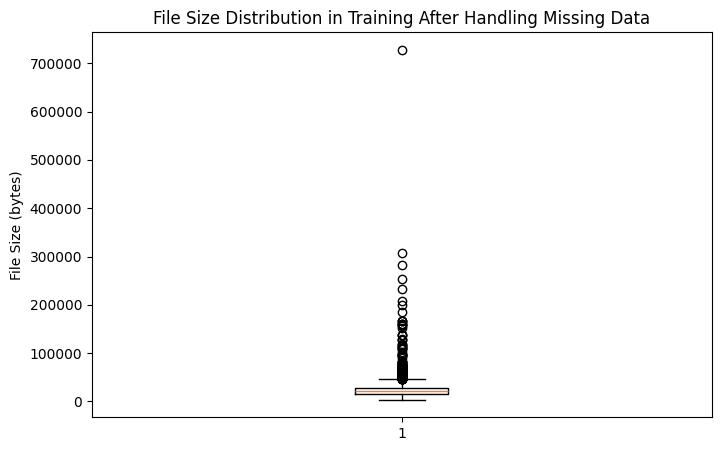

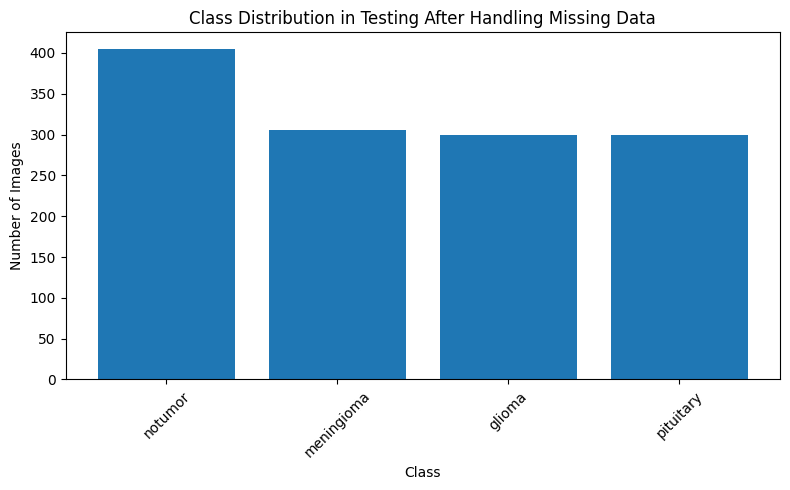

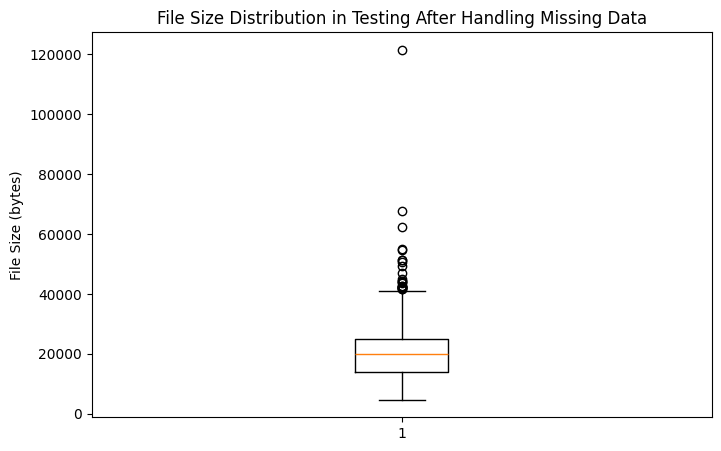

In [1]:
#Handling Missing Data (Individual Contribution)

# Install required library (OpenCV) if not present
!pip install opencv-python-headless -q

# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
from collections import Counter
import time
import numpy as np

# Step 1: Clone the Git repository containing the dataset
print("Cloning Git repository...")
start_time = time.time()
!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git
clone_time = time.time() - start_time
print(f"Repository cloned in {clone_time:.2f} seconds")

# Step 2: Define and verify the dataset path
train_dir = "/content/Brain-Tumor-Detection/data/Training"
test_dir = "/content/Brain-Tumor-Detection/data/Testing"
print(f"Checking Training directory: {train_dir}")
if not os.path.exists(train_dir):
    print(f"Error: Training path {train_dir} not found. Please verify the repository structure.")
    exit()
print(f"Training contents: {os.listdir(train_dir)}")
print(f"Checking Testing directory: {test_dir}")
if not os.path.exists(test_dir):
    print(f"Error: Testing path {test_dir} not found. Please verify the repository structure.")
    exit()
print(f"Testing contents: {os.listdir(test_dir)}")

# Step 3: Initial EDA - Count images before handling missing data
splits = ['Training', 'Testing']
split_dirs = {'Training': train_dir, 'Testing': test_dir}
# Updated classes based on actual subfolder names
classes = ['notumor', 'meningioma', 'glioma', 'pituitary']
initial_counts = {split: {} for split in splits}
image_sizes = {split: [] for split in splits}  # For box plots
for split in splits:
    split_path = split_dirs[split]
    if os.path.exists(split_path):
        for cls in classes:
            class_path = os.path.join(split_path, cls)
            if os.path.exists(class_path):
                image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.JPG'))]
                print(f"Files in {cls} ({split}): {image_files[:5]}...")  # Show first 5 files
                initial_counts[split][cls] = len(image_files)
                for img_file in image_files:
                    img_path = os.path.join(class_path, img_file)
                    try:
                        img_size = os.path.getsize(img_path)  # Size in bytes
                        image_sizes[split].append(img_size)
                    except Exception as e:
                        print(f"Error getting size for {img_path}: {e}")
print("Initial image counts:", initial_counts)

# Visualize initial distribution with bar and box plots
for split in splits:
    if initial_counts[split]:  # Bar plot for counts
        plt.figure(figsize=(8, 5))
        plt.bar(initial_counts[split].keys(), initial_counts[split].values())
        plt.title(f"Class Distribution in {split} Before Handling Missing Data")
        plt.xlabel("Class")
        plt.ylabel("Number of Images")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to plot for {split} (bar plot)")
    if image_sizes[split]:  # Box plot for file sizes
        plt.figure(figsize=(8, 5))
        plt.boxplot(image_sizes[split])
        plt.title(f"File Size Distribution in {split} Before Handling Missing Data")
        plt.ylabel("File Size (bytes)")
        plt.show()
    else:
        print(f"No data to plot for {split} (box plot)")

# Step 4: Handle missing data (My individual contribution - [Your IT Number])
# Justification: Removing corrupted images ensures the model doesn't crash during training; essential for our image-based dataset.
valid_images = {split: [] for split in splits}
valid_labels = {split: [] for split in splits}
for split in splits:
    split_path = split_dirs[split]
    if os.path.exists(split_path):
        for cls in classes:
            class_path = os.path.join(split_path, cls)
            if os.path.exists(class_path):
                image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.JPG'))]
                for img_file in image_files:
                    img_path = os.path.join(class_path, img_file)
                    try:
                        img = cv2.imread(img_path)
                        if img is None:
                            raise ValueError("Image is corrupted")
                        valid_images[split].append(img_path)
                        valid_labels[split].append(cls)
                    except Exception as e:
                        print(f"Removing missing/corrupted image in {split}: {img_path} (Error: {e})")

print(f"Total valid images after handling: {sum(len(valid_images[split]) for split in splits)}")

# Step 5: Post-handling EDA
valid_counts = {split: Counter(valid_labels[split]) for split in splits}
print("Image counts after handling missing data:", valid_counts)

# Visualize post-handling distribution with bar and box plots
for split in splits:
    if valid_counts[split]:  # Bar plot for counts
        plt.figure(figsize=(8, 5))
        plt.bar(valid_counts[split].keys(), valid_counts[split].values())
        plt.title(f"Class Distribution in {split} After Handling Missing Data")
        plt.xlabel("Class")
        plt.ylabel("Number of Images")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to plot for {split} (bar plot)")
    if image_sizes[split]:  # Box plot for file sizes
        plt.figure(figsize=(8, 5))
        plt.boxplot(image_sizes[split])
        plt.title(f"File Size Distribution in {split} After Handling Missing Data")
        plt.ylabel("File Size (bytes)")
        plt.show()
    else:
        print(f"No data to plot for {split} (box plot)")

# Step 6: Export visualizations for submission
output_dir = 'results/eda_visualizations'
os.makedirs(output_dir, exist_ok=True)
for split in splits:
    if initial_counts[split]:
        plt.figure(figsize=(8, 5))
        plt.bar(initial_counts[split].keys(), initial_counts[split].values())
        plt.title(f"Class Distribution in {split} Before Handling Missing Data")
        plt.xlabel("Class")
        plt.ylabel("Number of Images")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'{split}_before_bar.png'))
        plt.close()
    if valid_counts[split]:
        plt.figure(figsize=(8, 5))
        plt.bar(valid_counts[split].keys(), valid_counts[split].values())
        plt.title(f"Class Distribution in {split} After Handling Missing Data")
        plt.xlabel("Class")
        plt.ylabel("Number of Images")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'{split}_after_bar.png'))
        plt.close()
    if image_sizes[split]:
        plt.figure(figsize=(8, 5))
        plt.boxplot(image_sizes[split])
        plt.title(f"File Size Distribution in {split} Before Handling Missing Data")
        plt.ylabel("File Size (bytes)")
        plt.savefig(os.path.join(output_dir, f'{split}_before_box.png'))
        plt.close()